In [1]:
import we_panic_utils.nn.data_load as dl
import we_panic_utils.nn.processing as p
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import site
import os
import numpy as np
from PIL import Image

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
frame_dir = "rsz/Sa102/Trial1_frames"
frames = sorted(os.listdir(frame_dir))
frames = frames[0:60]
#frames = [os.path.join(frame_dir,frame) for frame in frames]
frames = [np.asarray(Image.open(os.path.join(frame_dir,frame)).convert('L')) for frame in frames]
#frames = np.array(frames)
#frames.shape
#frames
#frames = np.array(frames)
#frames.shape
frames[0]

array([[93, 93, 91, ..., 45, 43, 43],
       [93, 92, 91, ..., 44, 44, 43],
       [93, 92, 91, ..., 45, 45, 43],
       ...,
       [86, 85, 84, ..., 42, 40, 41],
       [86, 85, 85, ..., 41, 41, 40],
       [85, 85, 85, ..., 41, 40, 40]], dtype=uint8)

In [3]:
def get_frames_from_dir(frame_dir):
    frames = sorted(os.listdir(frame_dir))
    frames = frames[0:60]
    frames = [np.asarray(Image.open(os.path.join(frame_dir,frame)).convert('L')) for frame in frames
             if frame!='flow_h' and frame != 'flow_v' and frame != '.DS_Store']
    return frames

In [4]:
nb_frames = 60
def show_frame(num):
    print(num)
    current = frames[num]
    #img = Image.open(imgs[num])
    plt.imshow(np.asarray(current), cmap='gray')

In [4]:
frames = get_frames_from_dir('rsz/S0002/Trial1_frames')
def make_gif(frames, name):
    import imageio
    with imageio.get_writer(name, mode='I') as writer:
        for i, filename in enumerate(frames):
            print(i)
            #image = imageio.imread(filename)
            writer.append_data(filename)
make_gif(frames, 'S0002_rsz.gif')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
0


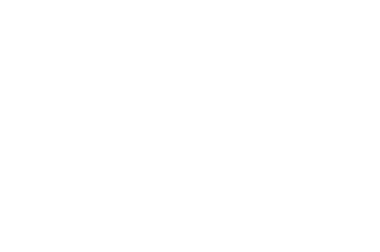

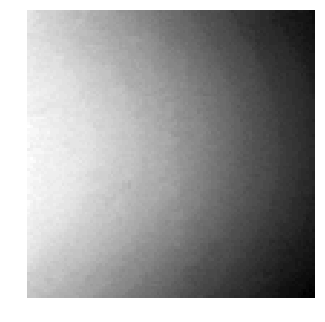

In [8]:
plt.clf()
plt.axis('off')
fig = plt.figure()
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

anim = animation.FuncAnimation(fig,
                              show_frame,
                              nb_frames,
                              fargs=())
anim.save('s0002_fast.mp4', writer='ffmpeg', dpi=600, fps=30)